In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [109]:
import yfinance as yf

start_date = '2010-01-01'
end_date = '2022-12-31'
symbol = 'AAPL'

df = yf.download(symbol, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422663,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800


In [110]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.860001,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,130.029999,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,126.040001,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.610001,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.929993,76960600


In [111]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422663,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800


In [112]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


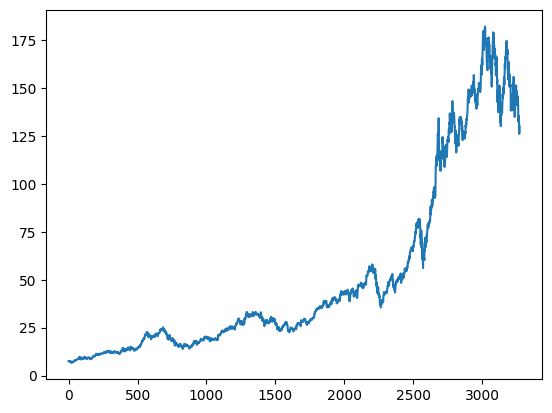

In [113]:
plt.plot(df.Close)

In [114]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3267,130.919998,132.419998,129.639999,131.860001,63814900
3268,131.380005,131.410004,128.720001,130.029999,69007800
3269,129.669998,131.029999,125.870003,126.040001,85438400
3270,127.989998,130.479996,127.730003,129.610001,75703700


In [115]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

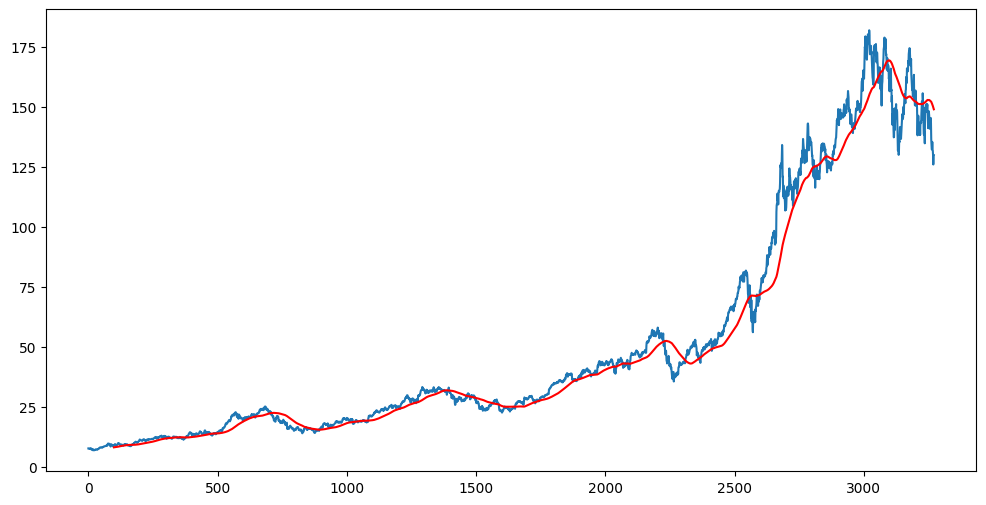

In [116]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [117]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

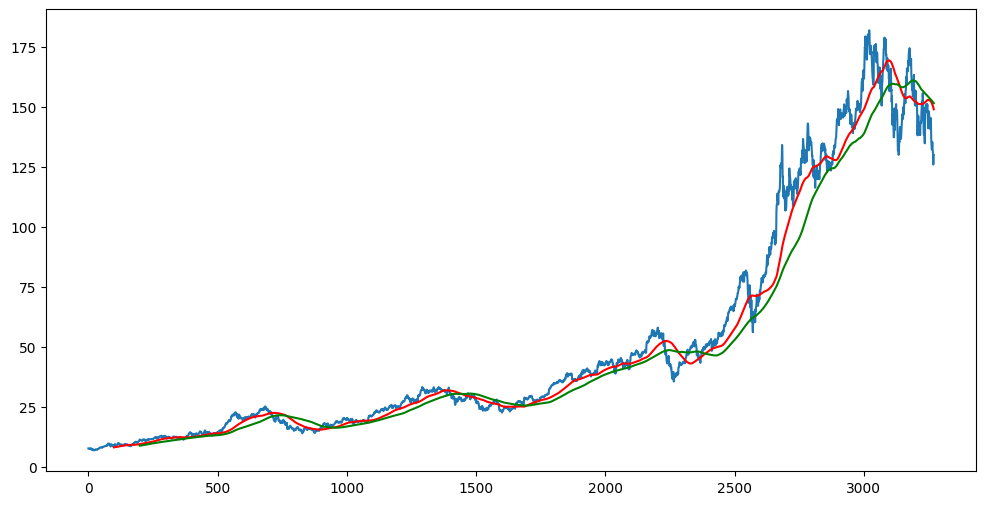

In [118]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [119]:
df.shape

(3272, 5)

In [120]:
# splitting into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape) 

(2290, 1)
(982, 1)


In [121]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [122]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [124]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [125]:
data_training_array.shape

(2290, 1)

In [126]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train,y_train=np.array(x_train),np.array(y_train) 


In [127]:
x_train.shape

(2190, 100, 1)

In [128]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [129]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,
               input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [130]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [131]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 29s 284ms/step - loss: 0.0373
Epoch 2/50
69/69 [==============================] - 18s 264ms/step - loss: 0.0078
Epoch 3/50
69/69 [==============================] - 18s 266ms/step - loss: 0.0083
Epoch 4/50
69/69 [==============================] - 18s 263ms/step - loss: 0.0063
Epoch 5/50
69/69 [==============================] - 16s 224ms/step - loss: 0.0052
Epoch 6/50
69/69 [==============================] - 12s 176ms/step - loss: 0.0052
Epoch 7/50
69/69 [==============================] - 12s 176ms/step - loss: 0.0046
Epoch 8/50
69/69 [==============================] - 12s 178ms/step - loss: 0.0046
Epoch 9/50
69/69 [==============================] - 12s 177ms/step - loss: 0.0045
Epoch 10/50
69/69 [==============================] - 13s 194ms/step - loss: 0.0042
Epoch 11/50
69/69 [==============================] - 13s 186ms/step - loss: 0.0037
Epoch 12/50
69/69 [==============================] - 13s 194ms/step - loss: 0.0044
Epoch 13/50
6

In [132]:
model.save('keras_model.h5')

In [133]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [134]:
data_training.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [135]:
past_100_days=data_training.tail(100)

In [136]:
final_df=past_100_days.append(data_testing, ignore_index=True)

C:\Users\yashika mishra\AppData\Local\Temp\ipykernel_16676\351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [137]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [138]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [139]:
input_data.shape

(1082, 1)

In [140]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [141]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)




(982, 100, 1)
(982,)


In [142]:
y_predicted=model.predict(x_test)

31/31 [==============================] - 2s 63ms/step


In [143]:
y_predicted

array([[0.09764808],
       [0.09823737],
       [0.09886304],
       [0.09950553],
       [0.10015427],
       [0.10079707],
       [0.10142717],
       [0.10203841],
       [0.10263279],
       [0.10320966],
       [0.10377118],
       [0.10432971],
       [0.1048924 ],
       [0.10546239],
       [0.10603203],
       [0.1065961 ],
       [0.10715938],
       [0.10772079],
       [0.10827135],
       [0.1087921 ],
       [0.10926801],
       [0.10972318],
       [0.11019522],
       [0.11070837],
       [0.11128309],
       [0.11194015],
       [0.11269623],
       [0.11354446],
       [0.11447357],
       [0.1155093 ],
       [0.11664434],
       [0.11782362],
       [0.11899616],
       [0.12013249],
       [0.12121196],
       [0.12222871],
       [0.12319022],
       [0.12412144],
       [0.12504932],
       [0.12599032],
       [0.12695788],
       [0.12797616],
       [0.12905174],
       [0.13018402],
       [0.13135102],
       [0.13252501],
       [0.13368343],
       [0.134

In [144]:
scaler.scale_

array([0.00682769])

In [145]:
scale_factor=1/0.2099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor


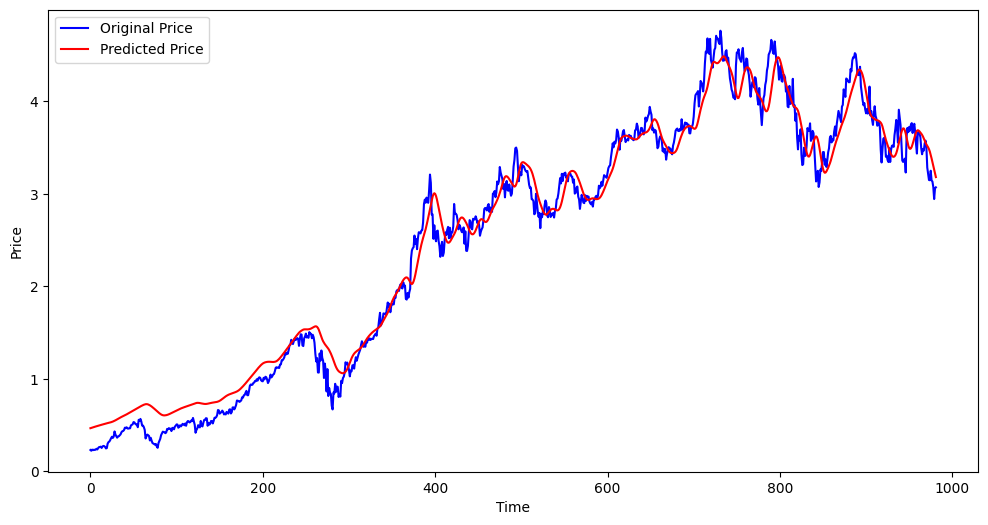

In [146]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()